In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Cutlets.csv to Cutlets.csv


For 5% Significance, alpha = 0.05. 
  As it is two-tailed test, alpha = 0.05/2 = 0.025

Null Hypothesis: Ho > 0.025

Alternative Hypothesis: Ha <= 0.025

To check whether there is any significance difference between the two samples.

**We conduct a 2 tailed t-test on 2 Independent samples.**

In [3]:
cutlets = pd.read_csv("Cutlets.csv")
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [5]:
unit_A = pd.Series(cutlets.iloc[:,0])
unit_A

0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit A, dtype: float64

In [6]:
unit_B = pd.Series(cutlets.iloc[:,1])
unit_B

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

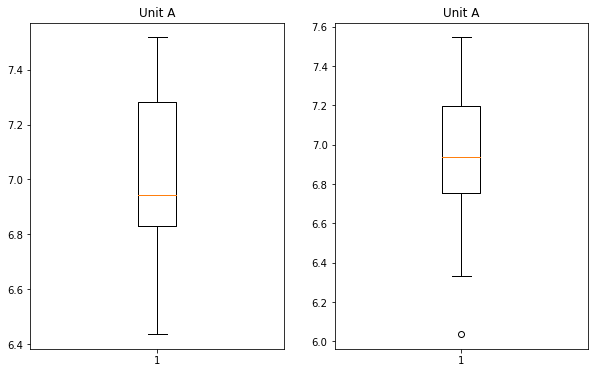

In [8]:
plt.subplots(figsize=(10,6))

plt.subplot(1,2,1)
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A')

plt.subplot(1,2,2)
plt.boxplot(cutlets['Unit B'])
plt.title('Unit A')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


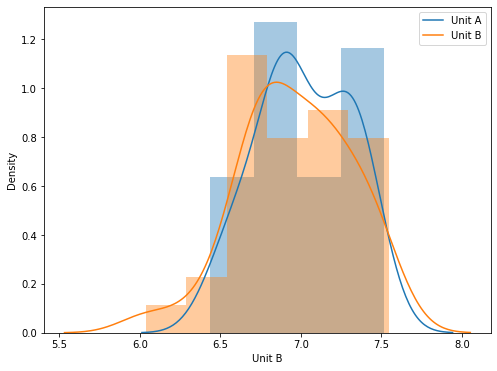

In [9]:
import seaborn as sns

plt.figure(figsize = (8,6))
sns.distplot(cutlets['Unit A'], kde=True)
sns.distplot(cutlets['Unit B'], kde=True)
plt.legend(labels=['Unit A','Unit B'])
plt.show()

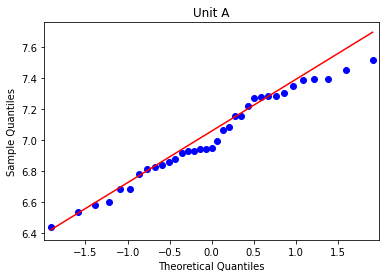

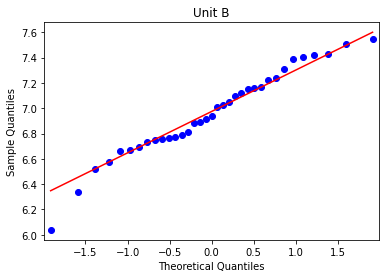

In [10]:
import statsmodels.api as sm

sm.qqplot(cutlets["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(cutlets["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

In [11]:
# 2-tail ttest for Unit A & Unit B
p_value=stats.ttest_ind(unit_A,unit_B)
p_value

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [12]:
print('p_value =',p_value[1])

p_value = 0.4722394724599501


If p_value<=alpha, we fail to reject Null Hypothesis because of lack of evidence

If p_value>alpha, we reject Null Hypothesis

In [13]:
alpha = 0.025
p_value = 0.472
print('Significnace=%.3f, p=%.3f'% (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis')
else:
    print('We fail to reject Null Hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null Hypothesis


Hence, We fail to reject Null Hypothesis because of lack of evidence.

**There is no significant difference between the two samples**